# 1. Setup And Load Data 
##### 1.1 Install Dependencies & Import 

In [1]:
# I installed the packages below through the terminal
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib 

import tensorflow as tf
import os

In [2]:
# Avoid Out Of Memory errors by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

##### 1.2 Load Data

In [3]:
import cv2 # opencv
import imghdr # check file extentions for certain images

C:\Users\glenn\AppData\Local\Temp\ipykernel_72332\2208628640.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr # check file extentions for certain images


In [4]:
image_extns = ['jpeg', 'jpg', 'png']
data_dir = 'data'

In [5]:
#img=cv2.imread(os.path.join('data', 'available', 'Screenshot 2023-03-17 153704.png'))
#img.shape
#plt.imshow(img)

In [6]:
# Check every image within the main 'Data' folder for incorrect
# file extention types
for folder in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, folder)):
        image_path = os.path.join(data_dir, folder, image)
        try:
            #img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extns:
                print('Image does not have valid extention', format(image_path))
                os.remove(image_path)
        except:
                print('Could not read image', format(image_path))

In [7]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [8]:
import numpy as np 
from matplotlib import pyplot as plt

In [9]:
# Builds image data set (this is the data pipeline)
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 435 files belonging to 2 classes.


In [10]:
# Data set is not preloaded into memory already (it is a 
# only a generator), so we have to convert data set into
# numpy iterator to access data 
data_iterator = data.as_numpy_iterator()

In [11]:
# Get batch of data
batch = data_iterator.next()

In [12]:
# images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [13]:
batch[1].shape

(32,)

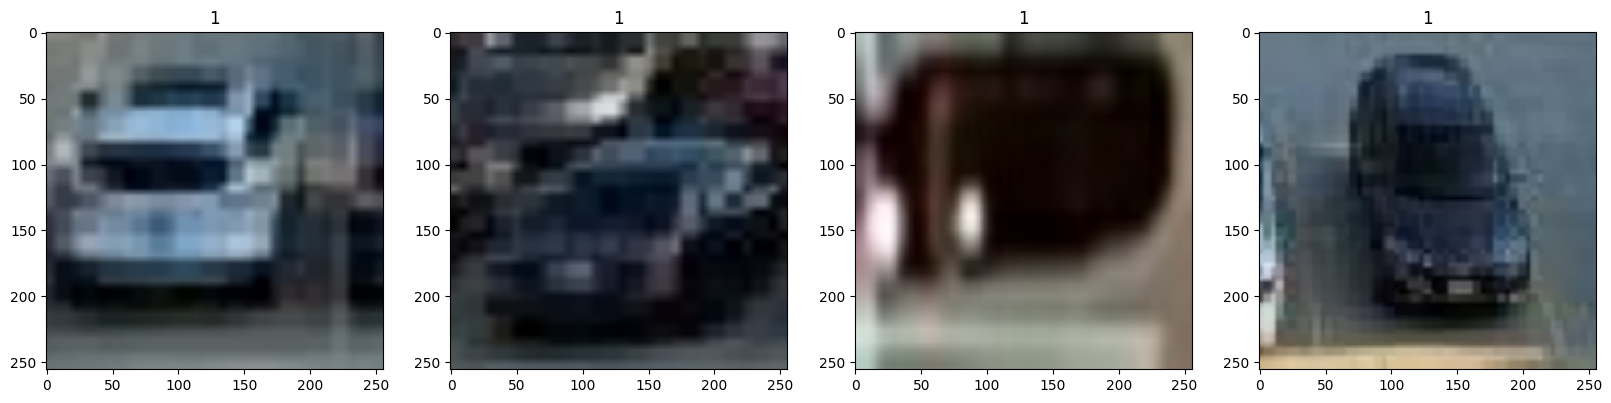

In [14]:
# Check what each flag is
# folder 0 = available
# folder 1 = unavailable
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocess Data
##### 2.1 Scale Data

In [15]:
scaledData = data.map(lambda x,y: (x/255, y))

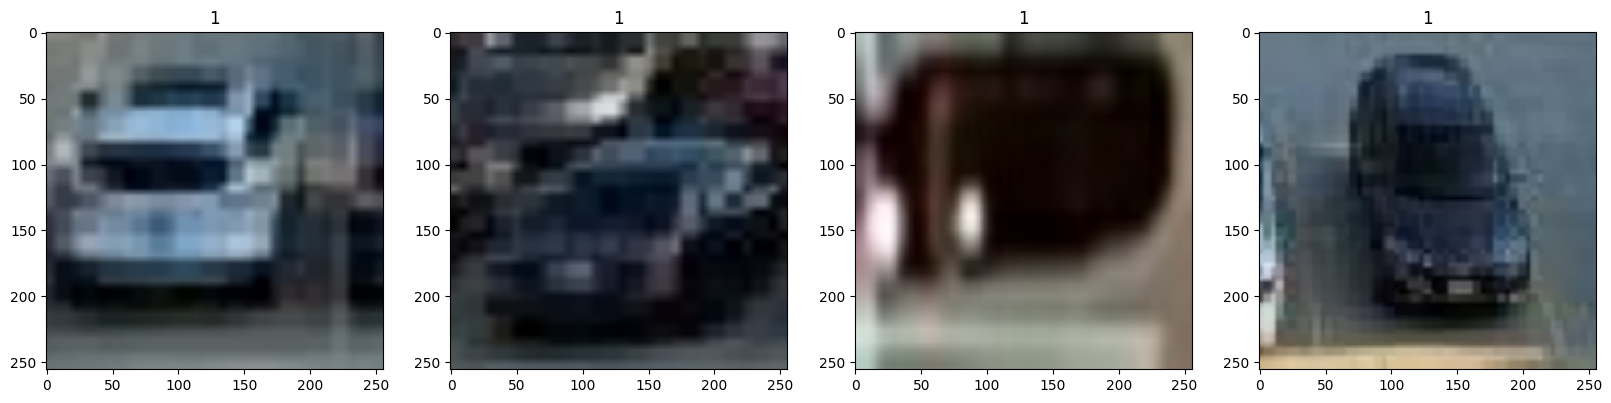

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

##### 2.2 Categorize Data 
###### into training and testing partition 

In [17]:
len(scaledData) #14 batches


14

In [18]:
# training data: what is used to train deep learning model
# validation data: used to evaluate model while training (fine tuning)
# test data: used post training to evaluate training
train_size = int(len(scaledData)*.7)
val_size = int(len(scaledData)*.2)+1
test_size = int(len(scaledData)*.1)+1

In [19]:
# take: defines how much data to use for partition 
train = scaledData.take(train_size)
validate = scaledData.skip(train_size).take(val_size)
test = scaledData.skip(train_size + val_size).take(test_size)

# 3. Deep Model
##### 3.1 Build Deep Learning Model 

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [21]:
# Establishing Sequential Class
model = Sequential()

In [22]:
# Adding convolutional layer and Mask Pool Layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

##### 3.2 Train

In [25]:
logdir = 'logs'

In [26]:
# Logs how the model performs
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [27]:
# .fit takes in training data
history = model.fit(train, epochs=20, validation_data=validate, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 4s 407ms/step - loss: 0.6670 - accuracy: 0.7500 - val_loss: 0.6085 - val_accuracy: 0.7604
Epoch 2/20
9/9 [==============================] - 4s 435ms/step - loss: 0.4582 - accuracy: 0.7396 - val_loss: 0.2612 - val_accuracy: 0.7812
Epoch 3/20
9/9 [==============================] - 4s 423ms/step - loss: 0.2945 - accuracy: 0.8333 - val_loss: 0.2913 - val_accuracy: 0.9062
Epoch 4/20
9/9 [==============================] - 4s 444ms/step - loss: 0.2503 - accuracy: 0.9167 - val_loss: 0.1947 - val_accuracy: 0.9583
Epoch 5/20
9/9 [==============================] - 5s 581ms/step - loss: 0.1998 - accuracy: 0.9583 - val_loss: 0.1487 - val_accuracy: 0.9583
Epoch 6/20
9/9 [==============================] - 5s 587ms/step - loss: 0.1262 - accuracy: 0.9653 - val_loss: 0.1054 - val_accuracy: 0.9583
Epoch 7/20
9/9 [==============================] - 5s 583ms/step - loss: 0.1159 - accuracy: 0.9757 - val_loss: 0.1116 - val_accuracy: 0.9583
Epoch 8/20
9/9 [====

In [28]:
history.history

{'loss': [0.6669877171516418,
  0.4582480192184448,
  0.2944927215576172,
  0.250262588262558,
  0.1997704803943634,
  0.12620531022548676,
  0.11590540409088135,
  0.1980026364326477,
  0.11616061627864838,
  0.0862264484167099,
  0.03798633813858032,
  0.06102608144283295,
  0.04465987905859947,
  0.052387651056051254,
  0.05127445235848427,
  0.017850570380687714,
  0.01744953542947769,
  0.02104039117693901,
  0.005251783411949873,
  0.006821499206125736],
 'accuracy': [0.75,
  0.7395833134651184,
  0.8333333134651184,
  0.9166666865348816,
  0.9583333134651184,
  0.9652777910232544,
  0.9756944179534912,
  0.9375,
  0.9548611044883728,
  0.9756944179534912,
  0.9965277910232544,
  0.9826388955116272,
  0.9861111044883728,
  0.9861111044883728,
  0.9826388955116272,
  0.9965277910232544,
  0.9930555820465088,
  0.9965277910232544,
  1.0,
  1.0],
 'val_loss': [0.6085465550422668,
  0.2611900866031647,
  0.291277676820755,
  0.19466839730739594,
  0.14865028858184814,
  0.10540613532

##### 3.3 Plot Data

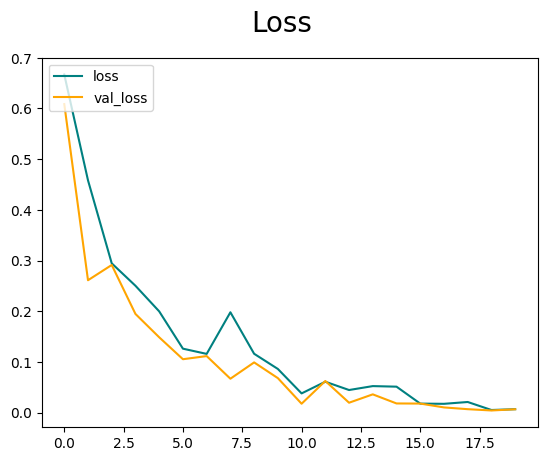

In [29]:
# show loss
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

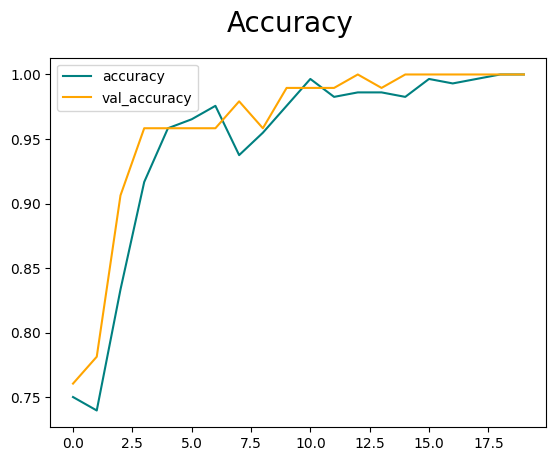

In [30]:
# show accuracy
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# 4. Evaluate Performance
##### 4.1 Evaluate

In [31]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [32]:
# 
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [33]:
# Loop through each batch in testing data
# x, y is set of images
# 
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 121ms/step


In [34]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


##### 4.2 Test

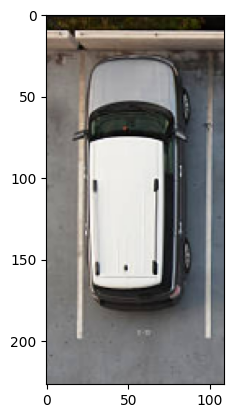

In [35]:
img = cv2.imread('unavailable_test.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

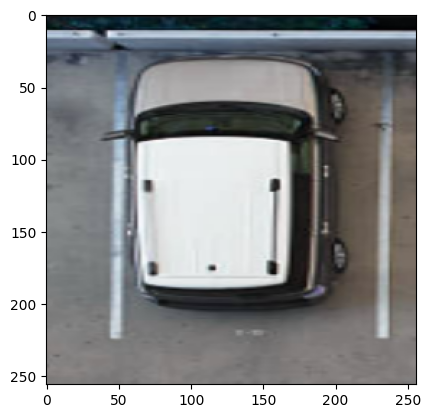

In [36]:
# format image for testing
resizeImg = tf.image.resize(img, (256, 256))
plt.imshow(resizeImg.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resizeImg/255,0))

1/1 [==============================] - 0s 24ms/step


In [38]:
yhat

array([[0.9985059]], dtype=float32)

In [39]:
if yhat > 0.5:
    print(f'Predicted class is uavailable')
else:
    print(f'Predicted class is available')

Predicted class is uavailable


# 5. Save The Model
##### 5.1 Save The Model

In [40]:
from keras.models import load_model

In [41]:
model.save(os.path.join('models', 'ParkingSpotStatusModel.h5'))

In [42]:
new_model = load_model(os.path.join('models', 'ParkingSpotStatusModel.h5'))

# 6. Reuseable Function 

In [43]:
""" def SpotStatus(parkingSpots):
    availableSpots = len(parkingSpots)
    parkingSpotStatusModel = load_model(os.path.join('models', 'ParkingSpotStatusModel.h5'))
    for spot in parkingSpots:
        parkingSpotStatusModel.predict(np.expand_dims(spot/255,0))
        if yhat > 0.5:
            availableSpots = availableSpots - 1
    return availableSpots """